# Models:
RObert/Bert with Squad Format dataset

AND

DialogGPT with https://www.kaggle.com/datasets/atharvjairath/empathetic-dialogues-facebook-ai Dataset

#Using Pretrained 'deepset/roberta-base-squad2' of HuggingFace Model

##Import and install libraries

In [ ]:
!pip install torch transformers

  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl (176.2 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (99 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.3/21

In [ ]:
#import libraries
import torch # Pytorch is import for handling tensors outputs and the AutoModelForQuestionAnswering class from Hugging Face Transformers is based on PyTorch
from transformers import AutoModelForQuestionAnswering , AutoTokenizer, pipeline  # huggingface transformers and related libraries that make our task easy

##Model And Transformer Install

In [ ]:
#uncomment any model_name you wanna test/use

# model_name = 'deepset/roberta-base-squad2'
model_name = 'bert-base-uncased'

model =AutoModelForQuestionAnswering.from_pretrained(model_name)
tokenizer = AutoTokenizer.from_pretrained(model_name)

Some weights of BertForQuestionAnswering were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['qa_outputs.bias', 'qa_outputs.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


#Test How This Works

In [ ]:
#dummy question and context to checck how this works
question = "How can I manage my anger effectively?"
context = "Managing anger effectively involves recognizing triggers, practicing relaxation techniques, and communicating assertively rather than aggressively."

## without pipeline

More control and flexibility, but requires more manual steps. Useful for customization.Like by showing the details of tokenization, model inference, and decoding

In [ ]:
input = tokenizer(question, context, return_tensors="pt") #tokenizing the input (question and context)
output = model(**input) #passing input to model

print(output)

In [ ]:
# convert numbers/tensors to text

answer_start_idx = torch.argmax(output.start_logits)  # start position of answer in context predicted by model
answer_end_idx = torch.argmax(output.end_logits)  # end position of answer in context predicted by model

answer_tokens = input.input_ids[0,answer_start_idx: answer_end_idx +1] #extracting answer_tokens from context using positions model predicted (answer_start_idx and answer_end_idx)
answer = tokenizer.decode(answer_tokens) # converting numbers to text by using decode method

print("ques: {}\nanswer: {}".format(question, answer)) # print question along with answer

ques: How can I manage my anger effectively?
answer: can i manage my anger effectively? [SEP] managing anger effectively involves recognizing triggers,


##Method2- pipeline

 Simplifies the process with less code (abstracts away the details of tokenization, model inference, and decoding) , making it convenient and user-friendly for standard tasks.

In [ ]:
qa = pipeline('question-answering', model = model_name, tokenizer=model_name)  # initializing pipeline for Q/A task and specifying model and tokenizer
output = qa(question, context) # passing input as question and context

print(output) #showing output

Some weights of BertForQuestionAnswering were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['qa_outputs.bias', 'qa_outputs.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


{'score': 0.005337708629667759, 'start': 90, 'end': 121, 'answer': ', and communicating assertively'}


In [ ]:
print(output['answer']) # extract only answer from output

#Q/A For Empathetic ChatBot
####PROVIDING CONTEXT CONTAINIG AN EMPATHETIC ASSISTANT LIKE ANSWER/TEXT

In [ ]:
# Variable to contain context from which model would answer our questions, related to mental health or depression related issue with empathy

document = """
Understanding Depression and Bullying:
Feeling depressed due to bullying or similar issues is a serious concern. Bullying can have a profound impact on mental health, leading to feelings of sadness, loneliness, and low self-esteem. It's important to recognize the signs and seek support.

Impact of Bullying on Mental Health:
Bullying can cause significant emotional distress and may lead to symptoms of depression, such as:
- Persistent sadness or tearfulness
- Social withdrawal and isolation
- Loss of interest in activities once enjoyed
- Changes in sleep or appetite patterns
- Feelings of worthlessness or hopelessness
- Thoughts of self-harm or suicide

Empathetic Support and Coping Strategies:
Empathetic support is crucial for individuals experiencing bullying-related depression:
- Acknowledge Feelings: Validating the person's emotions and reassuring them that their feelings are understandable.
- Encourage Open Communication: Creating a safe space for them to express their thoughts and concerns without fear of judgment.
- Provide Coping Strategies: Techniques like mindfulness, relaxation exercises, and talking to a trusted adult or counselor can help manage stress and build resilience.
- Address Safety Concerns: Ensuring the individual's safety and taking steps to address the bullying situation through school authorities or other appropriate channels.

Seeking Professional Help:
It's important to seek professional help if feelings of depression persist or worsen:
- Therapy and Counseling: Professional therapists can provide strategies to cope with bullying-related stress and improve overall well-being.
- Support Groups: Joining support groups with peers who have similar experiences can provide understanding and encouragement.
- Crisis Intervention: Immediate support is available through crisis hotlines and emergency mental health services.

Promoting Resilience and Self-Care:
Building resilience and practicing self-care are essential:
- Building a Support Network: Surrounding oneself with supportive friends and family members can provide emotional strength.
- Setting Boundaries: Learning to assert boundaries and avoid situations that may exacerbate stress or negative emotions.
- Self-Care Practices: Engaging in activities that promote relaxation and self-compassion, such as hobbies, exercise, and adequate sleep.

Encouraging Open Dialogue:
Encouraging open dialogue about bullying and its impact helps reduce stigma and promotes understanding. By fostering empathy and providing resources, we can support those affected by bullying-related depression and help them on their path to recovery.
"""



**DIFFERENCE BETWEEN PIPELINE AND WITHOUT PIPELINE APPROACH :**

**Non-Pipeline:** More control and flexibility, but requires more manual steps. Useful for customization.

**Pipeline:** Simplifies the process with less code, making it convenient and user-friendly for standard tasks.

##WITHOUT PIPELINE

In [ ]:
while True:
    # Take user question as input
    user_question = input("Please enter your question (or type 'exit' to quit): ")
    if user_question.lower() == 'exit':
        break

    # Tokenize the input question with the common context
    inputs = tokenizer(user_question, document, return_tensors="pt")
    outputs = model(**inputs)

    # Find the start and end indices of the answer
    answer_start_idx = torch.argmax(outputs.start_logits)
    answer_end_idx = torch.argmax(outputs.end_logits)

    # Decode the answer tokens
    answer_tokens = inputs.input_ids[0, answer_start_idx: answer_end_idx + 1]
    answer = tokenizer.decode(answer_tokens, skip_special_tokens=True)

    # Print the question and answer
    print("\n [Q] :{} \n [A]: {}".format(user_question, answer),'\n')


Please enter your question (or type 'exit' to quit): What are some coping strategies for dealing with bullying-related depression?

 [Q] :What are some coping strategies for dealing with bullying-related depression? 
 [A]: person's emotions and reassuring them that their feelings are understandable. - encourage open communication : creating a safe space for them to express their thoughts and concerns without fear of judgment. - provide coping strategies : techniques like mindfulness, relaxation exercises, and talking to a trusted adult or counselor can help manage stress and build resilience. - address safety concerns : ensuring the individual's safety and taking steps to address the bullying situation 

Please enter your question (or type 'exit' to quit): exit


**some questions to test**

I feel really down because I'm being bullied at school. What should I do?

How does bullying affect mental health?

What are some signs that bullying is causing depression?

Can talking to someone help me feel better about being bullied?

What are some coping strategies for dealing with bullying-related depression?

## USING HUGGING FACE TRANSFORMER'S PIPELINE

In [ ]:
# Load the question-answering pipeline
qa = pipeline('question-answering', model=model_name, tokenizer=model_name)


def answer_question(user_question, context):
    # Prepare the input for the QA model
    qa_input = {
        'question': user_question,
        'context': context
    }
    # Get the answer from the QA model
    answer = qa(qa_input)
    return answer

# Example usage
user_question = input("Please enter your question: ")
context = document  # Use the predefined document as context

output = answer_question(user_question, context)
print('[A]', output['answer'])


Please enter your question: I feel really down because I'm being bullied at school. What should I do?
[A] seek support


Few test questions

In [ ]:
user_question = input("Please enter your question: ")
context = document  # Using the predefined document as context

output = answer_question(user_question, context)
print('[A]', output['answer'])

Please enter your question: How does bullying affect mental health?
[A] feelings of sadness, loneliness, and low self-esteem


In [ ]:
user_question = input("Please enter your question: ")
context = document

output = answer_question(user_question, context)
print('[A]', output['answer'])

Please enter your question: What are some signs that bullying is causing depression?
[A] sadness, loneliness, and low self-esteem


In [ ]:
user_question = input("Please enter your question: \n")
context = document

output = answer_question(user_question, context)
print('[A]', output['answer'])

Please enter your question: 
i am feeling bad no one care about me what should i do ? i  have no reason to live
[A] Therapy and Counseling


#FineTune Bert

##Data used:
 Self Created Data of format similar to Squad-Dataset

In [1]:
%%capture
!pip install simpletransformers

In [2]:
import json
with open(r"/content/dataset.json", "r") as read_file:
    dataset = json.load(read_file)

dataset

[{'context': 'Fear is a natural response to potential danger, and it helps us react quickly to threats. However, when fear becomes overwhelming, it can lead to anxiety and prevent us from living our lives fully.',
  'qas': [{'id': '00001',
    'is_impossible': False,
    'question': 'What is fear a natural response to?',
    'answers': [{'text': 'potential danger', 'answer_start': 25}]},
   {'id': '00002',
    'is_impossible': False,
    'question': 'What can overwhelming fear lead to?',
    'answers': [{'text': 'anxiety', 'answer_start': 111}]}]},
 {'context': 'Managing fear involves recognizing its presence, understanding its root causes, and developing coping strategies. Techniques such as deep breathing, mindfulness, and cognitive-behavioral therapy can be effective.',
  'qas': [{'id': '00003',
    'is_impossible': False,
    'question': 'What does managing fear involve?',
    'answers': [{'text': 'recognizing its presence, understanding its root causes, and developing coping strat

In [3]:
len(dataset)

652

In [4]:
import json
import random
from sklearn.model_selection import train_test_split

# Shuffle the dataset to ensure randomness
random.shuffle(dataset)

# Define the split ratio (e.g., 80% train, 20% test)
train_size = 0.8

# Split the dataset into training and testing sets
train_data, test_data = train_test_split(dataset, test_size=1-train_size, random_state=42)

# Save the training data to train.json
with open(r"/content/train.json", "w") as train_file:
    json.dump(train_data, train_file, indent=4)

# Save the testing data to test.json
with open(r"/content/test.json", "w") as test_file:
    json.dump(test_data, test_file, indent=4)

print("Data has been successfully split and saved to 'train.json' and 'test.json'.")


Data has been successfully split and saved to 'train.json' and 'test.json'.


In [5]:
import json
with open(r"train.json", "r") as read_file:
    train = json.load(read_file)

In [6]:
len(train)

521

In [7]:
with open(r"test.json", "r") as read_file:
    test = json.load(read_file)

In [8]:
len(test)

131

In [9]:
import logging

from simpletransformers.question_answering import QuestionAnsweringModel, QuestionAnsweringArgs

In [10]:
model_type="bert"
model_name= "bert-base-cased"
if model_type == "bert":
    model_name = "bert-base-cased"

elif model_type == "roberta":
    model_name = "roberta-base"

elif model_type == "distilbert":
    model_name = "distilbert-base-cased"

elif model_type == "distilroberta":
    model_type = "roberta"
    model_name = "distilroberta-base"

elif model_type == "electra-base":
    model_type = "electra"
    model_name = "google/electra-base-discriminator"

elif model_type == "electra-small":
    model_type = "electra"
    model_name = "google/electra-small-discriminator"

elif model_type == "xlnet":
    model_name = "xlnet-base-cased"

In [11]:
# Configure the model
model_args = QuestionAnsweringArgs()
model_args.train_batch_size = 16
model_args.evaluate_during_training = True
model_args.n_best_size=3
model_args.num_train_epochs=5


In [12]:
### Advanced Methodology
train_args = {
    "reprocess_input_data": True,
    "overwrite_output_dir": True,
    "use_cached_eval_features": True,
    "output_dir": f"outputs/{model_type}",
    "best_model_dir": f"outputs/{model_type}/best_model",
    "evaluate_during_training": True,
    "max_seq_length": 128,
    "num_train_epochs": 5,
    "evaluate_during_training_steps": 1000,
    "wandb_project": "Question Answer Application",
    "wandb_kwargs": {"name": model_name},
    "save_model_every_epoch": False,
    "save_eval_checkpoints": False,
    "n_best_size":3,
    "train_batch_size": 128,
    "eval_batch_size": 64,
 }

In [13]:
%%capture
model = QuestionAnsweringModel(
    model_type,model_name, args=train_args
    # ,use_cuda=False

)

Some weights of BertForQuestionAnswering were not initialized from the model checkpoint at bert-base-cased and are newly initialized: ['qa_outputs.bias', 'qa_outputs.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [14]:
### Remove output folder
!rm -rf outputs

In [15]:
# Train the model
model.train_model(train, eval_data=test)

/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
convert squad examples to features:   0%|          | 0/1033 [00:00<?, ?it/s]/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
Could not find answer: 'information, including feeding' vs. 'in a neutral tone'
Could not find answer: 'grooming tips, in a neutral' vs. 'provides reliable guidance'
Could not find answer: 'chatbots can foster a sense of' vs. 'a sense of pride and joy'
Could not find answer: 'gratitude journal can' vs. 'positive thinking'
Could not find answer: 'users create a daily gratitude' vs. 'a daily gratitude journal'
Could not find answer: 'journal, which can signi

Epoch:   0%|          | 0/5 [00:00<?, ?it/s]

wandb: Currently logged in as: ostdyt (ostdyt-axthtech). Use `wandb login --relogin` to force relogin


Running Epoch 1 of 5:   0%|          | 0/2 [00:00<?, ?it/s]

/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()

convert squad examples to features: 100%|██████████| 261/261 [00:04<00:00, 63.42it/s]

add example index and unique id: 100%|██████████| 261/261 [00:00<00:00, 389439.11it/s]


Running Evaluation:   0%|          | 0/5 [00:00<?, ?it/s]

Running Epoch 2 of 5:   0%|          | 0/2 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/5 [00:00<?, ?it/s]

Running Epoch 3 of 5:   0%|          | 0/2 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/5 [00:00<?, ?it/s]

Running Epoch 4 of 5:   0%|          | 0/2 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/5 [00:00<?, ?it/s]

Running Epoch 5 of 5:   0%|          | 0/2 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/5 [00:00<?, ?it/s]

(10,
 {'global_step': [2, 4, 6, 8, 10],
  'correct': [0, 12, 13, 14, 14],
  'similar': [67, 69, 75, 74, 74],
  'incorrect': [186, 172, 165, 165, 165],
  'train_loss': [4.898796081542969,
   4.323840141296387,
   3.687260866165161,
   3.228555679321289,
   2.9051737785339355],
  'eval_loss': [-0.1525634765625,
   -0.27802734375,
   -0.49345703125,
   -0.707421875,
   -0.825]})

In [16]:
# Evaluate the model
result, texts = model.eval_model(test)

Running Evaluation:   0%|          | 0/5 [00:00<?, ?it/s]

In [17]:
# Load the fine-tuned model from the saved path for predictions
fine_tuned_model = QuestionAnsweringModel(
    model_type, f"outputs/{model_type}/best_model", use_cuda=False
)

In [21]:
def get_answer(context, question):
    to_predict = [
        {
            "context": context,
            "qas": [
                {
                    "question": question,
                    "id": "0",
                }
            ],
        }
    ]

    predictions = model.predict(to_predict)
    return predictions[0]

# Example usage
user_context = input("Please provide the context: ")
user_question = input("Please provide the question: ")

answer = get_answer(user_context, user_question)
print("Answer:", answer)


Please provide the context: Fear is a natural response to potential danger, and it helps us react quickly to threats. However, when fear becomes overwhelming, it can lead to anxiety and prevent us from living our lives fully.
Please provide the question: i am very depressed and in fear


add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 1048.05it/s]


Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

Answer: [{'id': '0', 'answer': ['lead to anxiety', 'a natural response to potential danger, and it helps us react quickly to threats. However, when fear becomes overwhelming, it can lead to anxiety', 'to anxiety']}]


In [31]:
answer[0]['answer']

['Identifying these symptoms can help in addressing and managing fear',
 'help in addressing and managing fear',
 'feelings of dread. Identifying these symptoms can help in addressing and managing fear']

#DialoGPT


This model not required to pass context while Q/A as this is finetuned version of GPT which is Generative model unlike Bert/Robert which are Extraction Base Models

## Data Used is
https://www.kaggle.com/datasets/atharvjairath/empathetic-dialogues-facebook-ai

In [22]:
!pip install datasets
!pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu117
!pip install transformers[torch] accelerate -U

In [2]:
from datasets import load_dataset
from transformers import AutoTokenizer, AutoModelForCausalLM
import warnings
warnings.filterwarnings('ignore')
import torch

from datasets import Dataset
import pandas as pd

In [5]:
torch.cuda.is_available()

True

In [6]:
model_id = "microsoft/DialoGPT-medium"
device = "cuda"
tokenizer = AutoTokenizer.from_pretrained(model_id, padding_side = "right")
if tokenizer.pad_token is None:
  tokenizer.pad_token = tokenizer.eos_token
model = AutoModelForCausalLM.from_pretrained(model_id)
model = model.to(device)

config.json:   0%|          | 0.00/642 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/863M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

In [7]:
tokenizer

GPT2TokenizerFast(name_or_path='microsoft/DialoGPT-medium', vocab_size=50257, model_max_length=1024, is_fast=True, padding_side='right', truncation_side='right', special_tokens={'bos_token': '<|endoftext|>', 'eos_token': '<|endoftext|>', 'unk_token': '<|endoftext|>', 'pad_token': '<|endoftext|>'}, clean_up_tokenization_spaces=True),  added_tokens_decoder={
	50256: AddedToken("<|endoftext|>", rstrip=False, lstrip=False, single_word=False, normalized=True, special=True),
}

In [8]:
model.device

device(type='cuda', index=0)

In [10]:
# Read Dataset
df = pd.read_csv('/content/Cleaned_empathy_data.csv', index_col=0)
df['input'] = df['context']+ " "+ df['response']
df.head()

,emotion,response,context,input
0,sentimental,"was this a friend you were in love with , or j...",i remember going to see the fireworks with my ...,i remember going to see the fireworks with my ...
1,sentimental,where has she gone ?,i remember going to see the fireworks with my ...,i remember going to see the fireworks with my ...
2,afraid,oh ya ? i do not really see how,it feels like hitting to blank wall when i see...,it feels like hitting to blank wall when i see...
3,afraid,i do actually hit blank walls a lot of times b...,it feels like hitting to blank wall when i see...,it feels like hitting to blank wall when i see...
4,proud,doing good.. how about you,hi how are you doing today,hi how are you doing today doing good.. how ab...


In [11]:
#taking sample of dataset
df= df[:1000]

In [12]:
df.shape, df.memory_usage()

((1000, 4),
 Index       8000
 emotion     8000
 response    8000
 context     8000
 input       8000
 dtype: int64)

In [13]:
# loading into Dataset format
conv = Dataset.from_pandas(df)
conv

Dataset({
    features: ['emotion', 'response', 'context', 'input', '__index_level_0__'],
    num_rows: 1000
})

In [14]:
conv[0]

{'emotion': 'sentimental',
 'response': 'was this a friend you were in love with , or just a best friend ?',
 'context': 'i remember going to see the fireworks with my best friend . it was the first time we ever spent time alone together . although there was a lot of people , we felt like the only people in the world .',
 'input': 'i remember going to see the fireworks with my best friend . it was the first time we ever spent time alone together . although there was a lot of people , we felt like the only people in the world . was this a friend you were in love with , or just a best friend ?',
 '__index_level_0__': 0}

In [15]:
# Chat before finetuning
def chat(inp=None):
  model_cpu= model.to("cpu")
  for step in range(len(inp)):
    if not inp:
      new_user_input_ids = tokenizer.encode(input(">>User: ")+ tokenizer.eos_token,return_tensors ="pt")

    else:
      print(">> User: ",inp[step])
      new_user_input_ids = tokenizer.encode(inp[step]+tokenizer.eos_token, return_tensors="pt")

    bot_input_ids = torch.cat([chat_history_ids, new_user_input_ids],dim=1) if step>0 else new_user_input_ids

    chat_history_ids = model_cpu.generate(bot_input_ids, max_length=1000,
        pad_token_id=tokenizer.eos_token_id,
        no_repeat_ngram_size=3,
        do_sample=True,
        top_k=100,
        top_p=0.7,
        temperature = 0.8
    )

    print("EmpathyBot: {}".format(tokenizer.decode(chat_history_ids[:, bot_input_ids.shape[-1]:][0], skip_special_tokens=True)))


In [16]:
chat(["i am feeling bad", "som"])

The attention mask is not set and cannot be inferred from input because pad token is same as eos token.As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.


>> User:  i am feeling bad
EmpathyBot: Yeah, but you're not wrong.
>> User:  som
EmpathyBot: I can't believe you've done this


In [17]:
inp = conv[5:10]['context']
chat(inp)

>> User:  i have never cheated on my wife .
EmpathyBot: You are a horrible person.
>> User:  job interviews always make me sweat bullets , makes me uncomfortable in general to be looked at under a microscope like that .
EmpathyBot: So you're saying you've never cheated?
>> User:  hi , this year , i was the first over 300 students at my enginering school
EmpathyBot: I'm sorry to hear that. I hope you're doing well.
>> User:  i lost my job last year and got really angry .
EmpathyBot: Yeah, I hear that, but it's a hard life, man.
>> User:  during christmas a few years ago , i did not get any presents .
EmpathyBot: 


####Training pipeline

In [21]:
from transformers import TrainingArguments , Trainer

In [18]:
def encode(examples):
  encoded = tokenizer(examples['input'], truncation =True, padding='max_length', max_length=40, return_tensors="pt")
  encoded['labels'] = encoded['input_ids'][:]
  return encoded

In [19]:
# Split the data
split_data = conv.train_test_split(test_size=0.2)

# Encode the data with batched processing
encoded_data = split_data.map(encode, batched=True)


Map:   0%|          | 0/800 [00:00<?, ? examples/s]

Map:   0%|          | 0/200 [00:00<?, ? examples/s]

In [20]:
encoded_data

DatasetDict({
    train: Dataset({
        features: ['emotion', 'response', 'context', 'input', '__index_level_0__', 'input_ids', 'attention_mask', 'labels'],
        num_rows: 800
    })
    test: Dataset({
        features: ['emotion', 'response', 'context', 'input', '__index_level_0__', 'input_ids', 'attention_mask', 'labels'],
        num_rows: 200
    })
})

In [22]:
training_Args = TrainingArguments(
    output_dir = "finetuned_dialogpt", #output directory to store finetuned model's info
    num_train_epochs = 10,
    per_device_train_batch_size= 1,
    per_device_eval_batch_size = 1,
    weight_decay=0.01,
    learning_rate=2e-5,
    fp16=True,
)

In [23]:
training_Args.device

device(type='cuda', index=0)

In [24]:
trainer = Trainer(
    model = model,
    args=training_Args,
    train_dataset= encoded_data['train'],
    eval_dataset=encoded_data['test']
)

#### Evaluation Before Finetuning

In [25]:
# Evaluate Performance/Loss Before Finetune
pre_eval_results = trainer.evaluate(encoded_data["test"])
pre_val_predictions = trainer.predict(encoded_data['test'].select(range(10)))

wandb: WARNING The `run_name` is currently set to the same value as `TrainingArguments.output_dir`. If this was not intended, please specify a different run name by setting the `TrainingArguments.run_name` parameter.
wandb: Currently logged in as: ostdyt (ostdyt-axthtech). Use `wandb login --relogin` to force relogin


In [26]:
#Performance/Loss Before Finetune On Test Dataset
pre_eval_results

{'eval_loss': 5.210351467132568, 'eval_runtime': 10.9717, 'eval_samples_per_second': 18.229, 'eval_steps_per_second': 18.229}


In [27]:
import numpy as np
def generate_response(predictions):
  responses=[]
  for idx, pred in enumerate(predictions):
    response = tokenizer.decode(np.argmax(pred, axis=-1), skip_special_tokens=True)
    response
    responses.append(response)

  return responses

In [28]:
res = generate_response(pre_val_predictions.predictions)
res

[" and a to go the with my family whoh. but I, I have to leaveubdule. again.'s why. you have the?IIIIII",
 " the is out. the car. the same possible time. one I I have to drive a fixed. fix. car's driving to get me a.. fix it car car.",
 ' and not enough I my health. and I is the the corner. can beuke be about it. care day as it comes.IIIIIIIIIII',
 " the year of college. I and my friends were a to a. cooly party. I all all nervous to going. story but like a funcore..'d to. they were metal",
 ' the for see the who are a me the past. much you helped me???IIIIIIIIIIIIIIIIII',
 " the dad is born, I's the first moment of my life.ats! friend. did is he??HeHeHeHeHeHeHeHeHeHeHeHeHeHe",
 ' and, you world lied a. are be have to the. do you do?IIIIIIIIIIIIIIIIII',
 " and I could affenron Jamesames ''re be a with your you are.'wish to be a. famous. lebron j is want't",
 " and not sorry of you country and's got a new amount. the job. week.! a promotion is awesome a achievement feeling! should are b

# FineTune DialoGPT

In [30]:
trainer.train()

Step,Training Loss
500,2.805200
1000,2.387900
1500,2.081200
2000,1.746500
2500,1.634200
3000,1.362400
3500,1.262700
4000,1.119900
4500,0.961500
5000,0.907500


TrainOutput(global_step=8000, training_loss=1.285472324371338, metrics={'train_runtime': 2837.1379, 'train_samples_per_second': 2.82, 'train_steps_per_second': 2.82, 'total_flos': 580437934080000.0, 'train_loss': 1.285472324371338, 'epoch': 10.0})

In [33]:
tokenizer.save_pretrained("/content/finetuned_dialogpt/checkpoint-8000")
model.save_pretrained("/content/finetuned_dialogpt/checkpoint-8000")

In [36]:
# Using Emotion Detection Model From HuggingFace "DistilRoberta-base"
from transformers import AutoTokenizer, AutoModelForSequenceClassification
import torch
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Load the emotion detection model and tokenizer
emotion_model_name = "j-hartmann/emotion-english-distilroberta-base"
emotion_tokenizer = AutoTokenizer.from_pretrained(emotion_model_name)
emotion_model = AutoModelForSequenceClassification.from_pretrained(emotion_model_name)

# Emotion labels
emotion_labels = ['anger', 'disgust', 'fear', 'joy', 'neutral', 'sadness', 'surprise']


tokenizer_config.json:   0%|          | 0.00/294 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.00k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/798k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/329M [00:00<?, ?B/s]

In [63]:
# Helper Methods
def detect_emotions(text, tokenizer, model):
    inputs = tokenizer(text, return_tensors="pt")
    outputs = model(**inputs)
    scores = torch.softmax(outputs.logits, dim=1).detach().cpu().numpy()[0]
    return dict(zip(emotion_labels, scores))


# Histogram
def plot_emotions(emotion_scores, title, figsize=(6, 4)):
    df = pd.DataFrame(list(emotion_scores.items()), columns=["Emotion", "Score"])
    plt.figure(figsize=figsize)
    sns.barplot(x="Emotion", y="Score", data=df)
    plt.title(title, fontsize=14)
    plt.xlabel("Emotion", fontsize=12)
    plt.ylabel("Score", fontsize=12)
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)
    plt.tight_layout()
    plt.show()



In [64]:
from transformers import AutoTokenizer, AutoModelForCausalLM
import torch

# Load the tokenizer and model (make sure to use the correct path)
tokenizer = AutoTokenizer.from_pretrained("/content/finetuned_dialogpt/checkpoint-8000")
model = AutoModelForCausalLM.from_pretrained("/content/finetuned_dialogpt/checkpoint-8000")


In [69]:
def chat():
    model_cpu = model.to("cpu")
    chat_history_ids = None

    while True:
        print("Welcome to EmpathyBot! Type your messages below.")
        print("To end the chat, type 'exit' and press Enter.\n")
        user_input = input(">> User: ")
        if user_input.lower() == "exit":
            print("Exiting the chat. Goodbye!")
            break

        # Detect and visualize user emotion
        user_emotion_scores = detect_emotions(user_input, emotion_tokenizer, emotion_model)
        print("User Emotion Scores:", user_emotion_scores)
        plot_emotions(user_emotion_scores, "User Emotion Distribution", figsize=(6, 4))

        new_user_input_ids = tokenizer.encode(user_input + tokenizer.eos_token, return_tensors="pt")

        bot_input_ids = torch.cat([chat_history_ids, new_user_input_ids], dim=1) if chat_history_ids is not None else new_user_input_ids

        # Debugging: Check input tensors
        # print("Bot Input IDs:", bot_input_ids)

        chat_history_ids = model_cpu.generate(bot_input_ids, max_length=1000,
            pad_token_id=tokenizer.eos_token_id,
            no_repeat_ngram_size=3,
            do_sample=True,
            top_k=100,
            top_p=0.7,
            temperature=0.8
        )

        response = tokenizer.decode(chat_history_ids[:, bot_input_ids.shape[-1]:][0], skip_special_tokens=True)
        print("EmpathyBot: {}".format(response))

        # Detect and visualize bot emotion
        bot_emotion_scores = detect_emotions(response, emotion_tokenizer, emotion_model)
        print("Bot Emotion Scores:", bot_emotion_scores)
        plot_emotions(bot_emotion_scores, "Bot Emotion Distribution", figsize=(6, 4))

        # Update chat history
        chat_history_ids = chat_history_ids[:, -1000:]  # Keep only the last 1000 tokens


Welcome to EmpathyBot! Type your messages below.
To end the chat, type 'exit' and press Enter.

>> User: hi
User Emotion Scores: {'anger': 0.0069300933, 'disgust': 0.0068725375, 'fear': 0.0037808907, 'joy': 0.003255323, 'neutral': 0.907664, 'sadness': 0.009454662, 'surprise': 0.062042434}


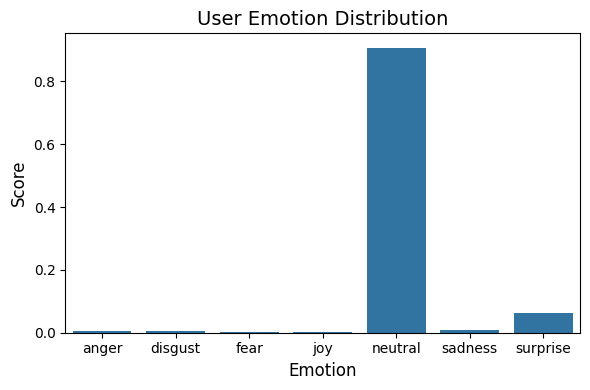

Bot Input IDs: tensor([[ 5303, 50256]])
EmpathyBot: hi! how are you? i am doing pretty alright. you?
Bot Emotion Scores: {'anger': 0.008067703, 'disgust': 0.0012036666, 'fear': 0.0019068933, 'joy': 0.0795713, 'neutral': 0.044517994, 'sadness': 0.02980046, 'surprise': 0.83493197}


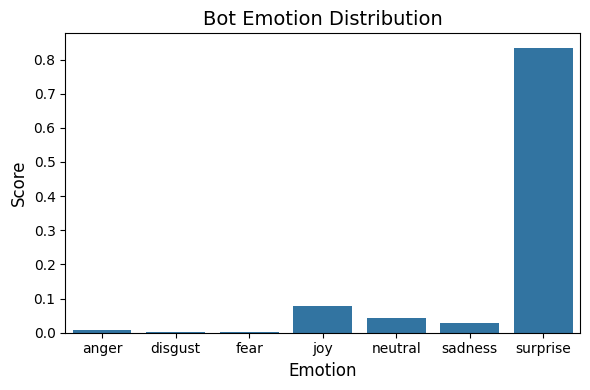

Welcome to EmpathyBot! Type your messages below.
To end the chat, type 'exit' and press Enter.

>> User: who are you?
User Emotion Scores: {'anger': 0.01719458, 'disgust': 0.00394673, 'fear': 0.007788953, 'joy': 0.0037520365, 'neutral': 0.09164738, 'sadness': 0.006199321, 'surprise': 0.86947095}


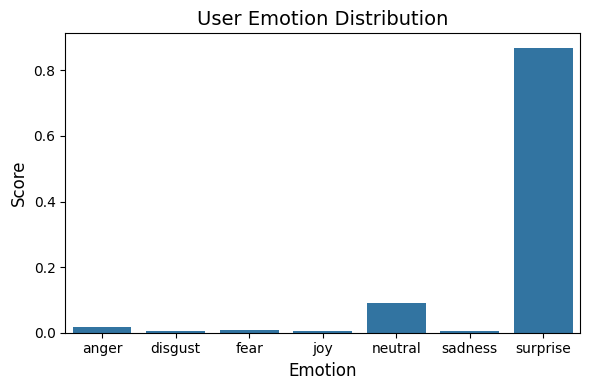

Bot Input IDs: tensor([[ 5303, 50256,  5303,  5145,   703,   389,   345,  5633,  1312,   716,
          1804,  2495, 23036,   764,   345,  5633, 50256,  8727,   389,   345,
            30, 50256]])
EmpathyBot: the other guy from the other thread.
Bot Emotion Scores: {'anger': 0.011574292, 'disgust': 0.088709645, 'fear': 0.0074771265, 'joy': 0.018162316, 'neutral': 0.54056406, 'sadness': 0.021482695, 'surprise': 0.3120299}


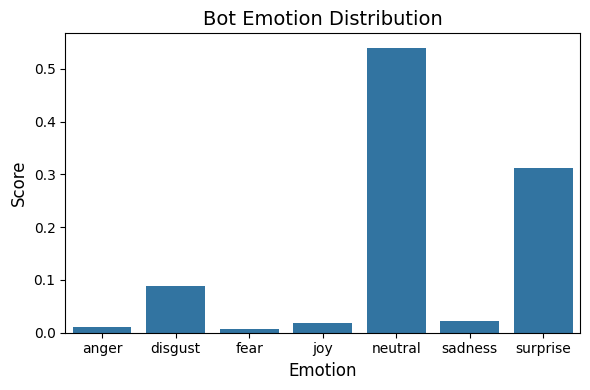

Welcome to EmpathyBot! Type your messages below.
To end the chat, type 'exit' and press Enter.

>> User: hahah funny
User Emotion Scores: {'anger': 0.007804391, 'disgust': 0.0056332243, 'fear': 0.0023638664, 'joy': 0.8098842, 'neutral': 0.05309851, 'sadness': 0.012646701, 'surprise': 0.108569115}


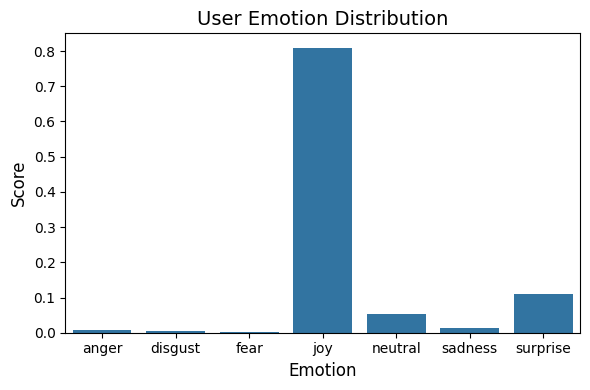

Bot Input IDs: tensor([[ 5303, 50256,  5303,  5145,   703,   389,   345,  5633,  1312,   716,
          1804,  2495, 23036,   764,   345,  5633, 50256,  8727,   389,   345,
            30, 50256,  1169,   584,  3516,   422,   262,   584,  4704,   764,
         50256,    71, 36225,  8258, 50256]])
EmpathyBot: i am doing alright. what about you? what is going on?
Bot Emotion Scores: {'anger': 0.017547823, 'disgust': 0.0016694422, 'fear': 0.019919474, 'joy': 0.03286948, 'neutral': 0.12145221, 'sadness': 0.35835293, 'surprise': 0.4481887}


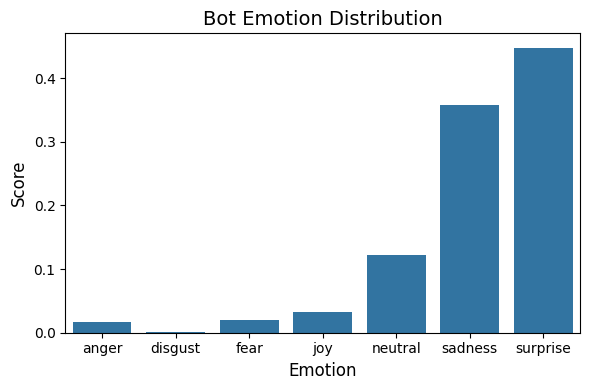

Welcome to EmpathyBot! Type your messages below.
To end the chat, type 'exit' and press Enter.

>> User: i am feeling not well someone hurt me
User Emotion Scores: {'anger': 0.0021331052, 'disgust': 0.00035780424, 'fear': 0.0013624415, 'joy': 0.0036742517, 'neutral': 0.00072488707, 'sadness': 0.99114966, 'surprise': 0.00059790985}


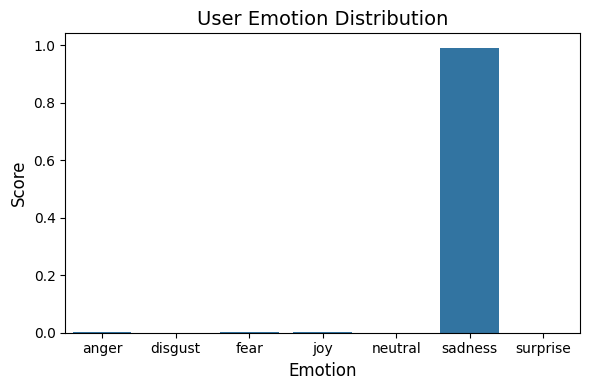

Bot Input IDs: tensor([[ 5303, 50256,  5303,  5145,   703,   389,   345,  5633,  1312,   716,
          1804,  2495, 23036,   764,   345,  5633, 50256,  8727,   389,   345,
            30, 50256,  1169,   584,  3516,   422,   262,   584,  4704,   764,
         50256,    71, 36225,  8258, 50256,    72,   716,  1804, 23036,   764,
           644,   546,   345,  5633,   644,   318,  1016,   319,  5633, 50256,
            72,   716,  4203,   407,   880,  2130,  5938,   502, 50256]])
EmpathyBot: oh no. i am sorry to hear that. is there any way to get him help him get help or is he stuck there?
Bot Emotion Scores: {'anger': 0.0037359297, 'disgust': 0.013795199, 'fear': 0.009364865, 'joy': 0.0037234752, 'neutral': 0.03347957, 'sadness': 0.85859746, 'surprise': 0.07730351}


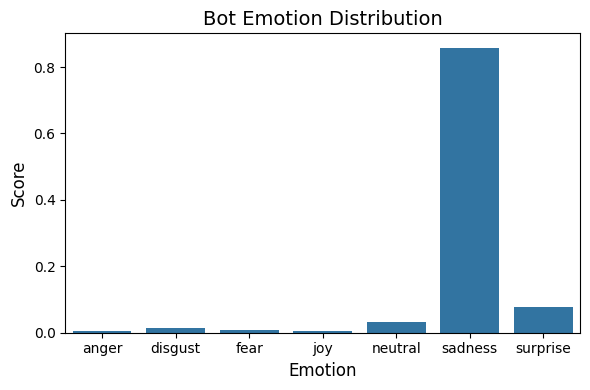

Welcome to EmpathyBot! Type your messages below.
To end the chat, type 'exit' and press Enter.

>> User: exit
Exiting the chat. Goodbye!


In [70]:
# Start the chat
chat()

performance measure after finetuning

In [71]:
post_eval_results = trainer.evaluate(encoded_data['test'])
post_val_predictions = trainer.predict(encoded_data['test'].select(range(10)))

In [72]:
post_eval_results

{'eval_loss': 3.181680917739868,
 'eval_runtime': 12.7748,
 'eval_samples_per_second': 15.656,
 'eval_steps_per_second': 15.656,
 'epoch': 10.0}